In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [46]:
dfs = pd.read_excel("DataSetVentes.xlsx", sheet_name=None)

In [47]:
df_pants_sales = dfs["Pants sales"]
print(df_pants_sales.head())

        Date  S/ billion Yuan  X4/ billion  X8/ 10\nmillion  X9/ 100 thousand  \
0 2016-05-01             2.23         3.84             1.48              1.12   
1 2016-06-01             2.14         3.85             1.44              1.09   
2 2016-07-01             1.72         3.30             1.19              0.97   
3 2016-08-01             1.46         2.81             1.00              0.87   
4 2016-09-01             1.86         3.05             1.17              1.02   

   X10/ million  
0          1.19  
1          1.16  
2          1.03  
3          0.93  
4          1.07  


In [48]:
print(df_pants_sales[df_pants_sales.duplicated()])

Empty DataFrame
Columns: [Date, S/ billion Yuan, X4/ billion, X8/ 10
million, X9/ 100 thousand, X10/ million]
Index: []


In [49]:
df_sweater_sales = dfs["Sweater sales"]
print(df_sweater_sales.head())

        Date  S/ billion Yuan  X4/ billion  X8/ 10\nmillion  X9/ 100 thousand  \
0 2016-05-01             0.63         1.11             3.66              4.71   
1 2016-06-01             0.46         0.82             2.72              3.91   
2 2016-07-01             0.42         0.81             2.70              3.55   
3 2016-08-01             0.91         1.86             6.60              5.33   
4 2016-09-01             1.90         3.78            12.69              8.13   

   X10/ million  
0          5.87  
1          4.97  
2          4.69  
3          7.20  
4         10.92  


In [50]:
print(df_sweater_sales[df_sweater_sales.duplicated()])

Empty DataFrame
Columns: [Date, S/ billion Yuan, X4/ billion, X8/ 10
million, X9/ 100 thousand, X10/ million]
Index: []


In [51]:
df_dress_sales = dfs["Dress sales."]
print(df_dress_sales.head())

        Date  S/ billion Yuan  X4/ billion  X8/ 10\nmillion  X9/ 100 thousand  \
0 2016-05-01             5.29        11.38             3.03              1.21   
1 2016-06-01             5.66        12.45             3.21              1.24   
2 2016-07-01             4.87        11.70             2.89              1.18   
3 2016-08-01             3.66         8.41             2.06              0.97   
4 2016-09-01             3.35         7.24             1.87              0.92   

   X10/ million  
0          1.98  
1          2.06  
2          1.88  
3          1.59  
4          1.51  


In [52]:
print(df_dress_sales[df_dress_sales.duplicated()])
df_dress_sales = df_dress_sales.drop_duplicates()
print(df_dress_sales[df_dress_sales.duplicated()])

         Date  S/ billion Yuan  X4/ billion  X8/ 10\nmillion  \
20 2017-12-01             1.81         3.94             0.95   

    X9/ 100 thousand  X10/ million  
20               0.5          1.06  
Empty DataFrame
Columns: [Date, S/ billion Yuan, X4/ billion, X8/ 10
million, X9/ 100 thousand, X10/ million]
Index: []


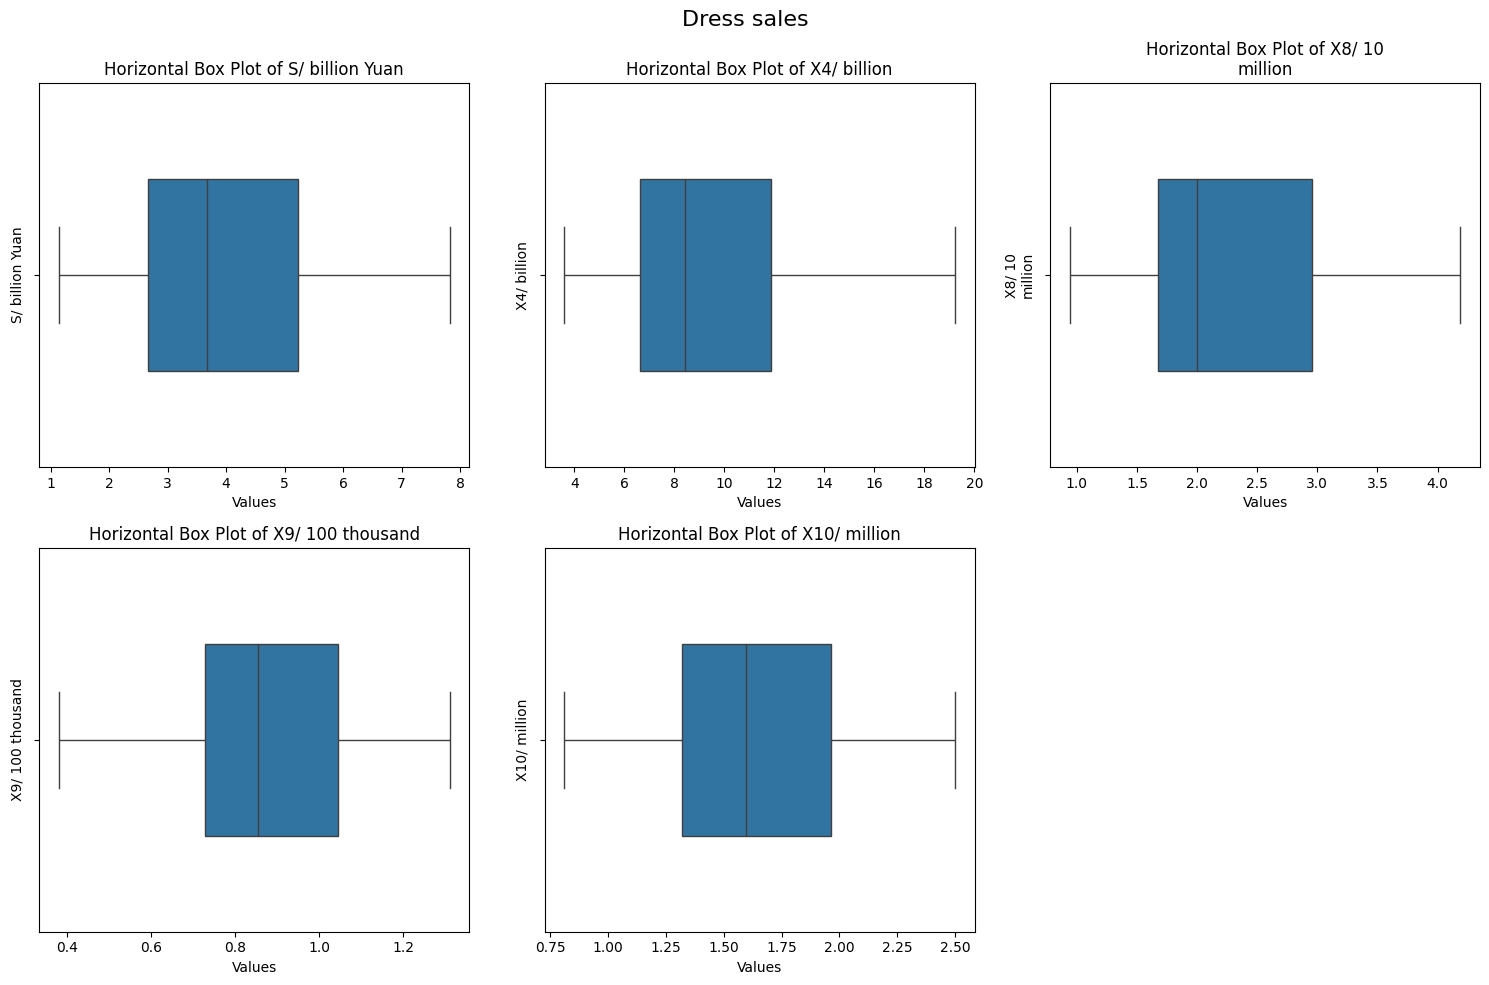

In [53]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Dress sales', fontsize=16)
axes = axes.flatten()

for i, column in enumerate(df_dress_sales.columns[1:7]):
    sns.boxplot(data=df_dress_sales[column], orient='h', ax=axes[i], width=0.5)
    axes[i].set_title(f'Horizontal Box Plot of {column}')
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel(column)


for j in range(len(df_dress_sales.columns[1:]), 6):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


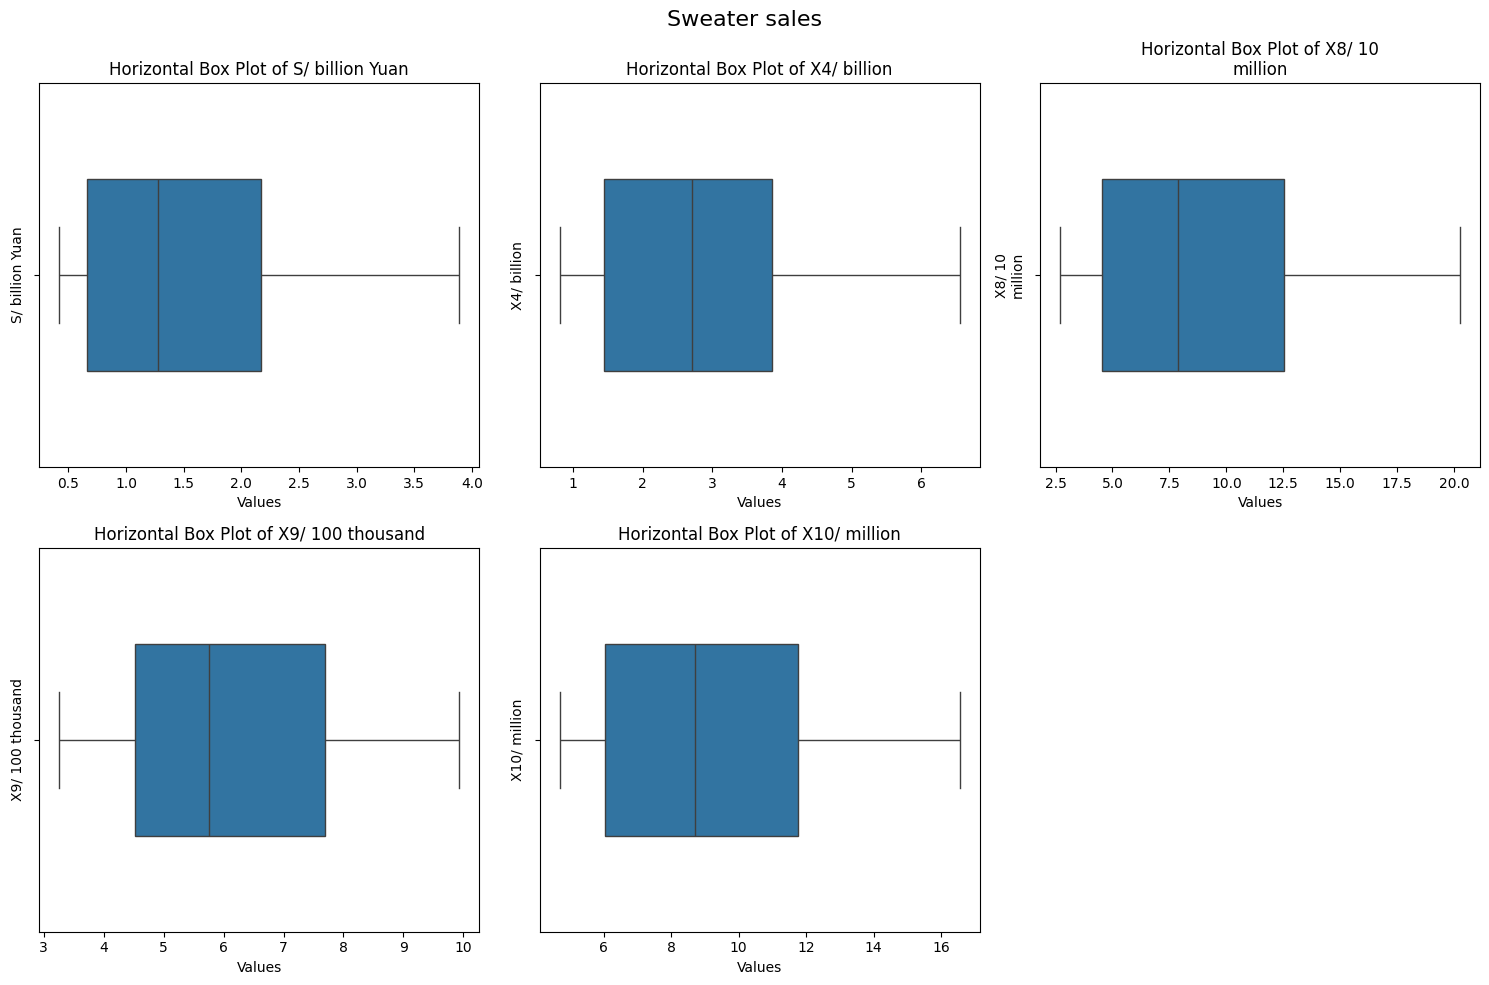

In [57]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Sweater sales', fontsize=16)
axes = axes.flatten()

for i, column in enumerate(df_sweater_sales.columns[1:7]):
    sns.boxplot(data=df_sweater_sales[column], orient='h', ax=axes[i], width=0.5)
    axes[i].set_title(f'Horizontal Box Plot of {column}')
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel(column)


for j in range(len(df_sweater_sales.columns[1:]), 6):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


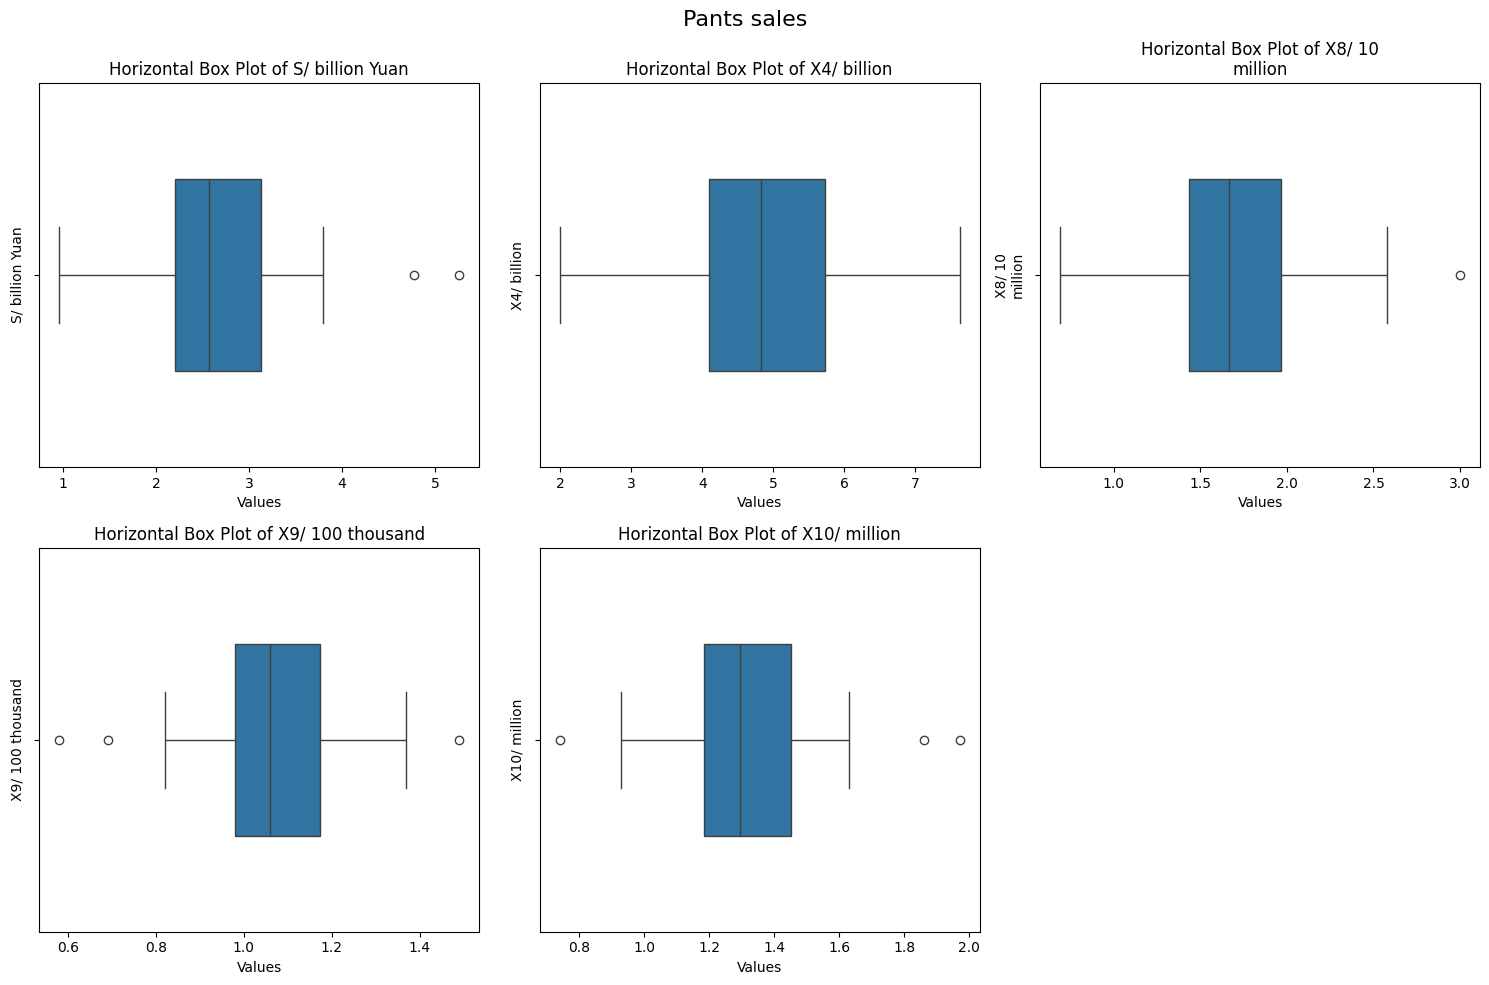

In [59]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Pants sales', fontsize=16)
axes = axes.flatten()

for i, column in enumerate(df_pants_sales.columns[1:7]):
    sns.boxplot(data=df_pants_sales[column], orient='h', ax=axes[i], width=0.5)
    axes[i].set_title(f'Horizontal Box Plot of {column}')
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel(column)


for j in range(len(df_pants_sales.columns[1:]), 6):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [80]:
numeric_cols = df_pants_sales.select_dtypes(include=['number'])
z_scores_pants = numeric_cols.apply(zscore)

outliers_3 = np.where((z_scores_pants > 3) | (z_scores_pants < -3))
print(outliers_3)
outliers_2_7 = np.where((z_scores_pants > 2.7) | (z_scores_pants < -2.7))
print(outliers_2_7)

(array([], dtype=int64), array([], dtype=int64))
(array([21, 30]), array([3, 0]))


In [81]:
numeric_cols = df_dress_sales.select_dtypes(include=['number'])
z_scores_dress = numeric_cols.apply(zscore)

outliers_3 = np.where((z_scores_dress > 3) | (z_scores_dress < -3))
print(outliers_3)
outliers_3 = np.where((z_scores_dress > 2.7) | (z_scores_dress < -2.7))
print(outliers_2_7)

(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))


In [83]:
numeric_cols = df_sweater_sales.select_dtypes(include=['number'])
z_scores_sweater = numeric_cols.apply(zscore)

outliers_3 = np.where((z_scores_sweater > 3) | (z_scores_sweater < -3))
print(outliers_3)
outliers_3 = np.where((z_scores_sweater > 2.7) | (z_scores_sweater < -2.7))
print(outliers_2_7)

(array([], dtype=int64), array([], dtype=int64))
(array([21, 30]), array([3, 0]))
